# Exercise 3: Inverse Dynamics


## 1. Data capturing and date preprocessing

1.	From the Moodle course, download the file **knee_squat_raw.mkv**

2.  Open the file in KINOVEA

3.	Pre-process the video data for optimal data extraction

4.	Introduce a length measurement reference by knowning that the shank-length (trochanter-knee distance) is 44cm. What could be the problem with this reference? Extract the segment length for the person (lower extremities).

5.	Develop a planar model for the knee squat – including ankle, knee, hip and shoulder joint
<br>
<br>
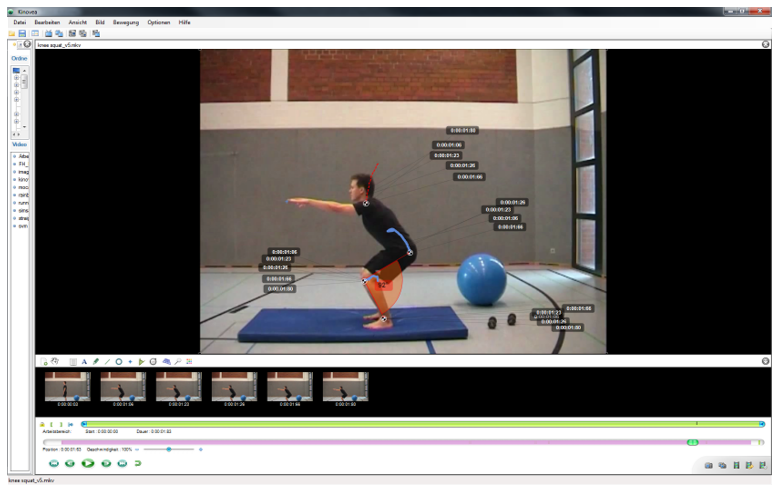
<br>
<br>
6.	Set a zero point at the left corner of the blue mat

7.	Extract the trajectories for the chosen joints throughout the whole ROM in Kinovea. 

8.	Export the trajectory data (MS-XML) and **create an Excel sheet with columns**: Time, AnkleX, AnkleY, KneeX, KneeY, HipX, HipY, ShoulderX, ShoulderY

9.	Load the data into pandas DataFrame

10.	Convert/scale the data from pixels to centimeters by using the information given in point 3 above.

11.	Plot a time vs. coordinate diagram for all trajectories (matplotlib)



### 1.1 Load the data into a pandas DataFrame

Use the function `pd.read_excel()` from the pandas module to create your DataFrame.
Inspect your DataFrame with the method `.head()`.

In [57]:
# Your code here
import pandas as pd
import numpy as np

# Read Excel file into a DataFrame
file_path = "PositionData.xlsx"  # Specify the file path
columns_to_read = ["Time", "AnkleX", "AnkleY", "KneeX", "KneeY", "HipX", "HipY", "ShoulderX", "ShoulderY"]
df = pd.read_excel(file_path, usecols=columns_to_read)

# Inspect the first few rows of the DataFrame
df.head()


,Time,ShoulderX,ShoulderY,HipX,HipY,KneeX,KneeY,AnkleX,AnkleY
0,0.00,340.19,379.38,341.81,246.11,330.31,140.46,351.57,33.19
1,0.03,338.94,380.63,340.81,246.11,334.32,140.47,351.57,33.20
2,0.07,338.93,380.63,347.57,242.61,328.06,140.47,351.57,33.19
3,0.10,337.93,379.63,348.58,243.60,327.06,141.46,351.56,33.20
4,0.13,337.94,379.63,348.58,243.60,327.06,141.45,351.56,33.20


### 1.2 Pre-process your DataFrame

The unit of the data in your DataFrame is <span style="color: orange;">pixels</span>. Convert/scale all relevant columns to <span style="color: orange;">centimeters</span> by using the shank length of 44 cm as reference.

<span style="color: orange;">Attention:</span> Check the pixel distance between knee and hip in all frames (rows). Is it constant? If not, what could be a workable solution? 

In [58]:
# Calculate scaling factor
shank_length_cm = 44
hip_knee_pix = np.sqrt((df['HipX'] - df['KneeX'])**2 + (df['HipY'] - df['KneeY'])**2)
scaling_factor = shank_length_cm / hip_knee_pix


# Convert relevant columns to centimeters
df_cm = df.copy()  # Make a copy of the original DataFrame
columns = ['Time', 'AnkleX', 'AnkleY', 'KneeX', 'KneeY', 'HipX', 'HipY', 'ShoulderX', 'ShoulderY']
df_cm[columns[1:]] = df_cm[columns[1:]] * scaling_factor.values[:, np.newaxis] 


# Check if pixel distance between knee and hip is constant
is_constant_distance = hip_knee_pix.nunique() == 1

# Print result
print("Knee and hip distance constant? -->", is_constant_distance)



Knee and hip distance constant? --> False


### It is not constant.
therefore we would need an average distance between knee and hip for a better calibration.

In [59]:
average_pixel_distance = hip_knee_pix.mean()

# Calculate scaling factor using average pixel distance
scaling_factor = shank_length_cm / average_pixel_distance

# Print the average pixel distance and scaling factor
print("Average distance knee - hip:", average_pixel_distance)
print("Scaling factor (cm / pixel):", scaling_factor)

# Convert relevant columns to centimeters
df_cm[columns[1:]] = df[columns[1:]] * scaling_factor
print(df_cm.head())
print(df_cm)

Average distance knee - hip: 118.00527455608868
Scaling factor (cm / pixel): 0.3728646890193583
   Time   ShoulderX   ShoulderY        HipX       HipY       KneeX      KneeY  \
0  0.00  126.844839  141.457406  127.448879  91.765729  123.160935  52.372574   
1  0.03  126.378758  141.923487  127.076015  91.765729  124.656123  52.376303   
2  0.07  126.375029  141.923487  129.596580  90.460702  122.321990  52.376303   
3  0.10  126.002164  141.550622  129.973173  90.829838  121.949125  52.745439   
4  0.13  126.005893  141.550622  129.973173  90.829838  121.949125  52.741710   

       AnkleX     AnkleY  
0  131.088039  12.375379  
1  131.088039  12.379108  
2  131.088039  12.375379  
3  131.084310  12.379108  
4  131.084310  12.379108  
    Time   ShoulderX   ShoulderY        HipX       HipY       KneeX  \
0   0.00  126.844839  141.457406  127.448879  91.765729  123.160935   
1   0.03  126.378758  141.923487  127.076015  91.765729  124.656123   
2   0.07  126.375029  141.923487  129.5965

### 1.3 Visualize your data

Plot a time vs. coordinate diagram for all trajectories with `matplotlib`

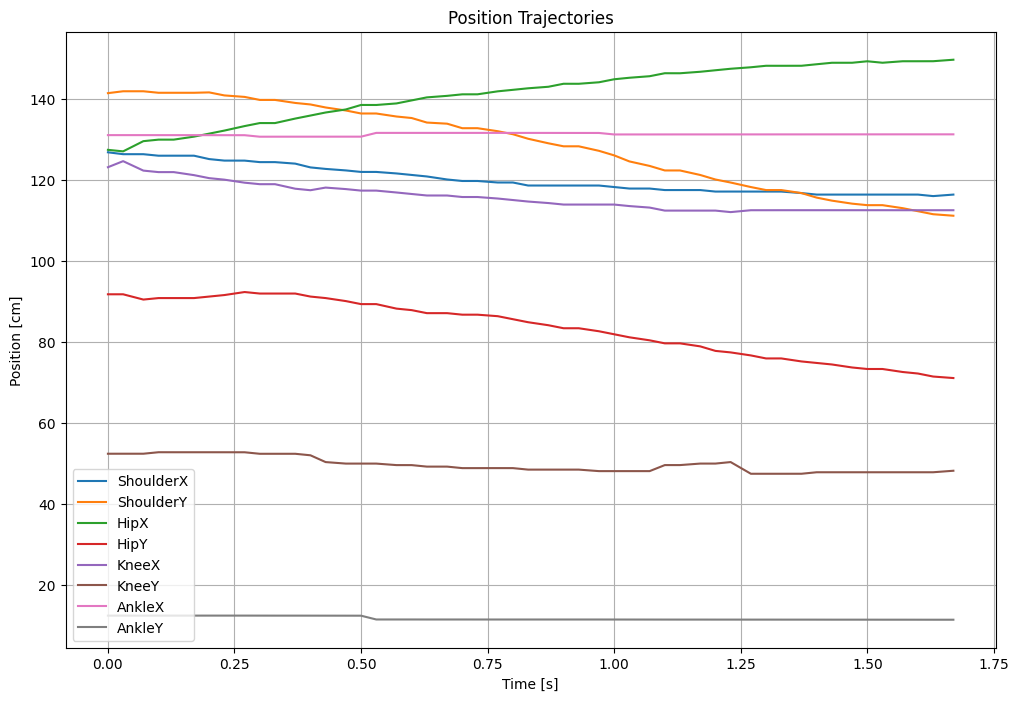

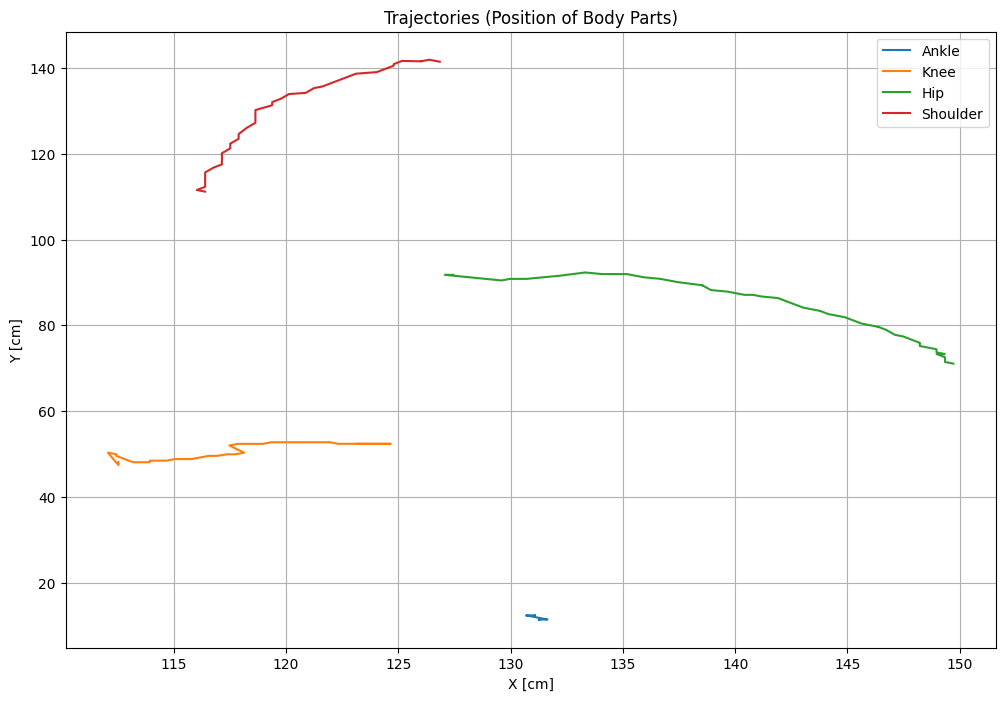

In [60]:
import matplotlib.pyplot as plt

#Plot each column against time
plt.figure(figsize=(12, 8))

for column in df_cm.columns[1:]:
    plt.plot(df_cm['Time'], df_cm[column], label=column)

plt.xlabel('Time [s]')
plt.ylabel('Position [cm]')
plt.title('Position Trajectories')
plt.legend()
plt.grid(True)
plt.show()


#Second Diagram
#Plot trajectories for position (X vs Y diagram)
plt.figure(figsize=(12, 8))

#Ankle
plt.plot(df_cm['AnkleX'], df_cm['AnkleY'], label='Ankle')

#Knee
plt.plot(df_cm['KneeX'], df_cm['KneeY'], label='Knee')

#Hip
plt.plot(df_cm['HipX'], df_cm['HipY'], label='Hip')

#Shoulder
plt.plot(df_cm['ShoulderX'], df_cm['ShoulderY'], label='Shoulder')

plt.xlabel('X [cm]')
plt.ylabel('Y [cm]')
plt.title('Trajectories (Position of Body Parts)')
plt.legend()
plt.grid(True)
plt.show()


## 2 Inverse Dynamics

### 2.1 Create new variables

Create the variables <span style="color: orange;">ankle_coord</span>, <span style="color: orange;">knee_coord</span>, <span style="color: orange;">hip_coord</span>, and <span style="color: orange;">shoulder_coord</span> and assign them to their respective X and Y coordinates using 2D `numpy` arrays.

<span style="color: orange;">Hint:</span> Use the pandas methods `.loc[]` and `.to_numpy()` to select data from your DataFrame and convert it to a numpy array. Once converted, check the shape of your numpy array with `.shape`.

In [61]:
import numpy as np

# Select X and Y coordinates for each body part from the DataFrame
ankle_coord = df_cm.loc[:, ['AnkleX', 'AnkleY']].to_numpy()
knee_coord = df_cm.loc[:, ['KneeX', 'KneeY']].to_numpy()
hip_coord = df_cm.loc[:, ['HipX', 'HipY']].to_numpy()
shoulder_coord = df_cm.loc[:, ['ShoulderX', 'ShoulderY']].to_numpy()


# Check the shape of each numpy array
print("Shape of ankle_coord:", ankle_coord.shape)
print("Shape of knee_coord:", knee_coord.shape)
print("Shape of hip_coord:", hip_coord.shape)
print("Shape of shoulder_coord:", shoulder_coord.shape)



Shape of ankle_coord: (51, 2)
Shape of knee_coord: (51, 2)
Shape of hip_coord: (51, 2)
Shape of shoulder_coord: (51, 2)


### 2.2 Create a planar model

Provide a function with input parameters ankle_coord, knee_coord, hip_coord, shoulder_coord, call it `def planar_model(ankle_coord, knee_coord, hip_coord, shoulder_coord)`, that visualizes the planar model over time and shows the **position of the center of mass** for **each segment in every point of time** in the model graph.

To implement this you will need to work with `FuncAnimation` from `matplotlib.animation`.

<span style="color: orange;">Resource:</span> https://matplotlib.org/stable/users/explain/animations/animations.html

The code below will give you some guidance but won't execute. Feel free to use it as a base for your implementation.





In [62]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def planar_model(ankle_coord, knee_coord, hip_coord, shoulder_coord):
    """
    Visualize the movement of a planar model of the human body over a series of frames.
    
    This function creates an animation that represents the movement of the shank, thigh, and torso
    by plotting their respective centers of mass and segments for each frame based on the provided
    coordinates of the ankle, knee, hip, and shoulder.
    
    Parameters:
    ankle_coord : array_like
        A two-dimensional numpy array where each row contains the x and y coordinates of the ankle for a frame.
    knee_coord : array_like
        A two-dimensional numpy array where each row contains the x and y coordinates of the knee for a frame.
    hip_coord : array_like
        A two-dimensional numpy array where each row contains the x and y coordinates of the hip for a frame.
    shoulder_coord : array_like
        A two-dimensional numpy array where each row contains the x and y coordinates of the shoulder for a frame.
    
    Returns:
    None
        The function creates and displays the animation in the Jupyter notebook cell but does not return any value.
    
    Note:
    This function requires an active Jupyter notebook environment to render the animation properly.
    It uses the FuncAnimation class from matplotlib.animation to create the animation and IPython.display.HTML
    to display it within the notebook.
    """

    # Initialize the figure
    fig, ax = plt.subplots()
    # List to store the plotting information for each frame
    lines = []
    # Number of frames
    frames = range(len(ankle_coord))

    def init():
        # Set up the plot environment
        ax.clear()
        # TODO: Customize your plot initialization (set limits, labels, titles, grid)
        ax.set_xlim(50, 200)
        #...
                
        # Return an empty list of lines to be animated
        return lines

    def update(i):
        # Clear existing lines on each frame update
        for line in lines:
            line.remove()
        lines.clear()

        # TODO: Calculate the x and y coordinates of the body parts AND centers of mass

        # TODO: Plot body segments and centers of mass for the current frame
        # Examples:
        # line, = ax.plot(shank_x, shank_y,...)
        # lines.append(line) 
        # ...     

        # Return the list of lines to be animated
        return lines
    
    # Create the animation using FuncAnimation
    ani = FuncAnimation(fig, update, init_func=init, frames=frames, interval=50)

    # Display the animation in your Jupyter notebook
    display(HTML(ani.to_jshtml()))

On calling the function you should get something like this:

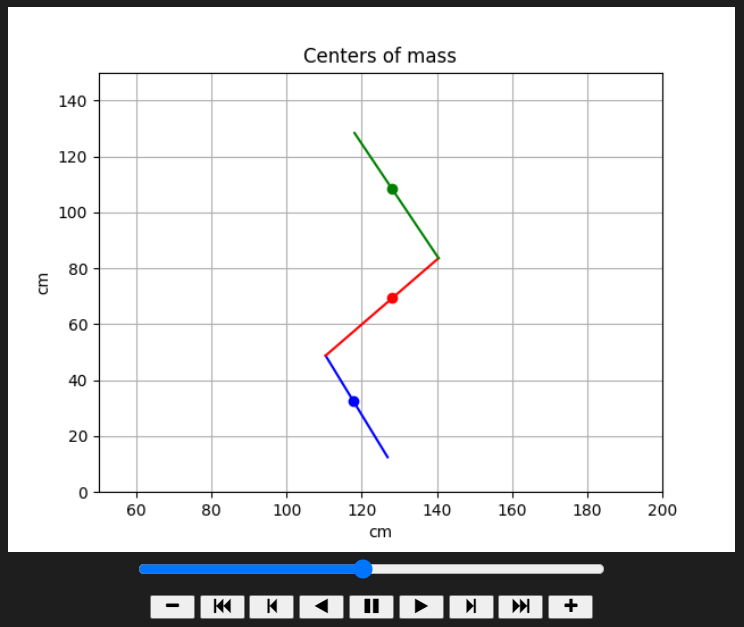

Write your code:

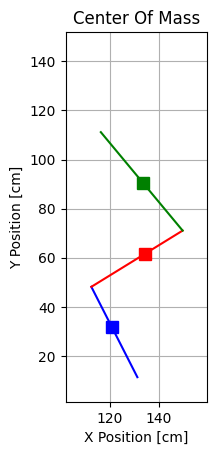

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def planar_model(ankle_coord, knee_coord, hip_coord, shoulder_coord):

    # Initialize the figure
    fig, ax = plt.subplots()
    # List to store the plotting information for each frame
    lines = []
    # Number of frames
    frames = range(len(ankle_coord))

    def init():
        # Set up the plot environment
        ax.clear()
        # Customize your plot init
        min_x = np.min(np.array([ankle_coord[:, 0], knee_coord[:, 0], hip_coord[:, 0], shoulder_coord[:, 0]]))
        min_y = np.min(np.array([ankle_coord[:, 1], knee_coord[:, 1], hip_coord[:, 1], shoulder_coord[:, 1]]))
        max_x = np.max(np.array([ankle_coord[:, 0], knee_coord[:, 0], hip_coord[:, 0], shoulder_coord[:, 0]]))
        max_y = np.max(np.array([ankle_coord[:, 1], knee_coord[:, 1], hip_coord[:, 1], shoulder_coord[:, 1]]))

        ax.set_aspect('equal') 
        ax.set_xlim(min_x - 10, max_x + 10)
        ax.set_ylim(min_y - 10, max_y + 10)
        ax.set_xlabel('X Position [cm]')
        ax.set_ylabel('Y Position [cm]')
        ax.set_title('Center Of Mass')
        ax.grid(True)
                
        # Return an empty list of lines to be animated
        return lines

    def update(i):
        # Clear existing lines on each frame update
        for line in lines:
            line.remove()
        lines.clear()

        # Plot body segments and centers of mass for the current frame
        line_leg, = ax.plot([ankle_coord[i, 0], knee_coord[i, 0]],[ankle_coord[i, 1], knee_coord[i, 1]], linestyle='-',  color='blue')
        line_thigh, = ax.plot([knee_coord[i, 0], hip_coord[i, 0]],[knee_coord[i, 1], hip_coord[i, 1]], linestyle='-',  color='red')
        line_corpus, = ax.plot([hip_coord[i, 0], shoulder_coord[i, 0]],[hip_coord[i, 1], shoulder_coord[i, 1]], linestyle='-',  color='green')
        
        weight_leg = 0.4459
        weight_thigh = 0.4095
        weight_corpus = 0.5138

        # Calculate centers of mass
        leg_center_x = ((weight_leg) * ankle_coord[i,0] + (1-weight_leg) * knee_coord[i,0])
        leg_center_y = ((weight_leg) * ankle_coord[i,1] + (1-weight_leg)* knee_coord[i,1])
        leg_center = [leg_center_x, leg_center_y]
        thigh_center_x = ((weight_thigh) * knee_coord[i,0] + (1-weight_thigh) * hip_coord[i,0])
        thigh_center_y = ((weight_thigh) * knee_coord[i,1] + (1-weight_thigh) * hip_coord[i,1])
        thigh_center = [thigh_center_x, thigh_center_y]
        corpus_center_x = ((weight_corpus) * hip_coord[i,0] + (1-weight_corpus) * shoulder_coord[i,0])
        corpus_center_y = ((weight_corpus) * hip_coord[i,1] + (1-weight_corpus) * shoulder_coord[i,1])
        corpus_center = [corpus_center_x, corpus_center_y]

        # print(leg_center)
        # print(leg_center.shape)
        # print(leg_center[i,0])
        # print(leg_center[i])

        # Plot centers of mass
        leg_center_marker, = ax.plot(leg_center[0], leg_center[1], marker='s', markersize=8, color='blue', label='Leg Center of Mass')
        thigh_center_marker, = ax.plot(thigh_center[0], thigh_center[1], marker='s', markersize=8, color='red', label='Thigh Center of Mass')
        corpus_center_marker, = ax.plot(corpus_center[0], corpus_center[1], marker='s', markersize=8, color='green', label='Corpse Center of Mass')



        # Append lines to the list to be animated
        lines.extend([line_leg, line_thigh, line_corpus, leg_center_marker, thigh_center_marker, corpus_center_marker])
        return lines



        
    # Create the animation using FuncAnimation
    ani = FuncAnimation(fig, update, init_func=init, frames=frames, interval=50, blit=True)

    # Display the animation in your Jupyter notebook
    display(HTML(ani.to_jshtml()))

planar_model(ankle_coord, knee_coord, hip_coord, shoulder_coord)



### 2.3	Provide a script for implementing a first **Inverse Dynamics** on the planar model with the functions `torque_calc()` and `knee_angle()`

* `def torque_calc(F_distal_x, F_distal_y, M_distal, weight, x_distal, x_proximal, weight_factor, roh_factor, rotation_direction)`  - function returns -> <span style='color: orange'>F_proximal_x</span>, <span style='color: orange'>F_proximal_y</span>, <span style='color: orange'>M_proximal</span>

    This function will be used to calculate the torque in both hip and knee

* `def knee_angle(ankle_coord, knee_coord, hip_coord)`- function returns -> <span style='color: orange'>knee_angle_degrees</span>

Assume the GRF (ground reaction force) is constant with 700 N in vertical direction.

In [64]:
import numpy as np

def torque_calc(F_distal_x, F_distal_y, M_distal, weight, x_distal, x_proximal, weight_factor, roh_factor, rotation_direction):
    """
    Calculate the torque at the proximal joint based on the forces and moments at the distal joint.

    Parameters:
        F_distal_x : float
            Force component in the x-direction at the distal joint.
        F_distal_y : float
            Force component in the y-direction at the distal joint.
        M_distal : float
            Moment at the distal joint.
        weight : float
            Weight of the body segment.
        x_distal : float
            Distance from the distal joint to the center of mass.
        x_proximal : float
            Distance from the proximal joint to the center of mass.
        weight_factor : float
            Factor to adjust the weight contribution to the torque.
        roh_factor : float
            Factor to adjust the contribution of the distance between the joint and the center of mass to the torque.
        rotation_direction : int
            Direction of rotation (1 for counterclockwise, -1 for clockwise).

    Returns:
        F_proximal_x : float
            Force component in the x-direction at the proximal joint.
        F_proximal_y : float
            Force component in the y-direction at the proximal joint.
        M_proximal : float
            Moment at the proximal joint.
    """
    # Calculate the weight contribution to the torque
    torque_weight = weight * weight_factor * roh_factor * rotation_direction

    # Calculate the torque due to the force components
    torque_force_x = F_distal_y * x_distal * rotation_direction
    torque_force_y = F_distal_x * x_distal * rotation_direction

    # Calculate the torque due to the moment
    torque_moment = M_distal

    # Calculate the total torque at the proximal joint
    M_proximal = torque_weight + torque_force_x - torque_force_y + torque_moment

    # Calculate the force components at the proximal joint
    F_proximal_x = F_distal_x
    F_proximal_y = F_distal_y - weight + M_distal / x_distal

    return F_proximal_x, F_proximal_y, M_proximal

def knee_angle(ankle_coord, knee_coord, hip_coord):
    """
    Calculate the knee angle in degrees based on the coordinates of ankle, knee, and hip joints.

    Parameters:
        ankle_coord : array_like
            Array of ankle coordinates.
        knee_coord : array_like
            Array of knee coordinates.
        hip_coord : array_like
            Array of hip coordinates.

    Returns:
        knee_angle_degrees : array_like
            Array of knee angles in degrees.
    """
    # Vector from knee to ankle
    ankle_to_knee = knee_coord - ankle_coord
    # Vector from knee to hip
    hip_to_knee = knee_coord - hip_coord
    
    # Dot product of ankle_to_knee and hip_to_knee
    dot_product = np.sum(ankle_to_knee * hip_to_knee, axis=1)
    # Magnitudes of ankle_to_knee and hip_to_knee vectors
    magnitude_product = np.linalg.norm(ankle_to_knee, axis=1) * np.linalg.norm(hip_to_knee, axis=1)
    
    # Calculate the cosine of the knee angle using dot product formula
    cos_theta = dot_product / magnitude_product
    
    # Avoid numerical errors causing invalid cosines
    cos_theta = np.clip(cos_theta, -1.0, 1.0)
    
    # Calculate the knee angle in radians
    knee_angle_radians = np.arccos(cos_theta)
    
    # Convert the knee angle to degrees
    knee_angle_degrees = np.degrees(knee_angle_radians)
    
    return knee_angle_degrees




### 2.4 Expand your `planar_model()`

Implement a realtime (means for every time point in the data vector) torque presentation for hip and knee of your planar model.

* Calculate the torque in the knee with `torque_calc()`
* Calculate the torque in the hip with `torque_calc()`
* Add the results to the plotting logic

Your animation should look something like this:

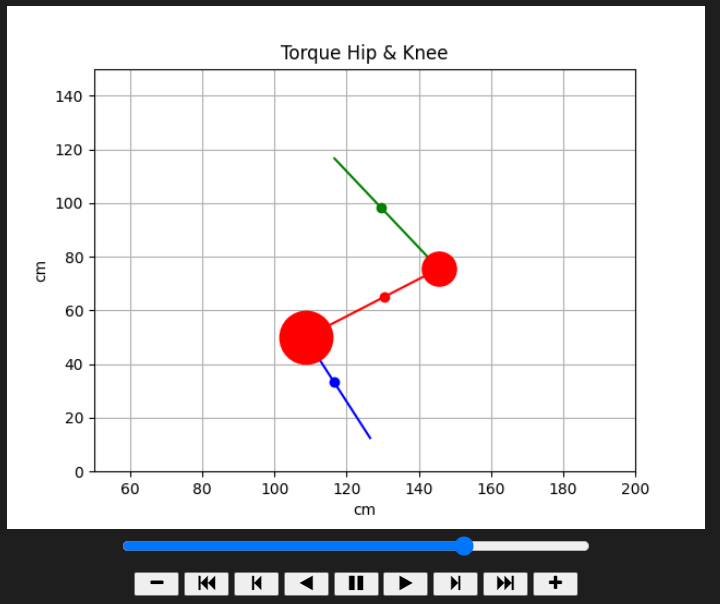




### 2.5 Knee joint angle

* Estimate the <span style='color: orange'>knee joint angle</span> throughout the range of motion using the `knee_angle()` function
* Provide a separate plot with a time vs. joint angle representation, label the axes and provide a title


## 3 Exercise Report

* Provide a written report including description of used processes for solving the tasks and screenshots of your plots
* Upload your report and completed Jupyter Notebook